<h2>Working with LandSAF Data</h2>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import h5py
import os, glob
from datetime import datetime
from matplotlib import patheffects

### Making sure GDAL is installed and working

In [2]:
import gdal as gdal
import osr
#help(gdal)

### Trying LandSAF's suggetstion code for reprojection of data to make a new .tif file with comments

The <strong>gdal_translate</strong> utility can be used to convert raster data between different formats, potentially performing some operations like subsettings, resampling, and rescaling pixels in the process.

The <strong>gdalwarp</strong> utility is an image mosaicing, reprojection and warping utility. The program can reproject to any supported projection, and can also apply GCPs stored with the image if the image is “raw” with control information.

In [102]:
# So far I've only gotten this for the MDfAPAR files (FAPAR)

in_pathfiles = '*.h5' # Where the new .tif file will be placed
out_pathfiles = './' # Where .hdf5 files exist
myfiles = glob.glob(in_pathfiles) #list of all files

for f in myfiles:
    filename = f.split("\\")[-1]
    print("filename:",filename,"\n")
    
    f_out = filename[:-3] + ".tif"  # splitting the .hd5 off the fileneame and making a new .tif filename
    print("f_out:",f_out,"\n")
    
    f_rep = filename[:-3] + "_rep.tif" # create a new final .tif filename for reprojection
    print("f_rep:",f_rep,"\n")
    
    # Translating the satellite height and ellipitical values to xy values and filling the new .tif file
    os.system('gdal_translate -of GTiff -a_srs "+proj=geos +h=35785831 +a=6378169 +b=6356583.8 +no_defs"\
    -a_ullr  -5568748.27576  5568748.27576 5568748.27576 -5568748.27576 HDF5:'+ filename +'://DSLF '+ f_out)
    
    # Mapping the new values and filling the new rep.tif file
    os.system('gdalwarp -ot Float32 -s_srs "+proj=geos +h=35785831 +a=6378169 +b=6356583.8 +no_defs"\
    -t_srs EPSG:4326 -r near -of GTiff ' + f_out + ' ' + f_rep)
   
print("done.")

filename: HDF5_LSASAF_MSG_DSLF_MSG-Disk_202009230000.h5 

f_out: HDF5_LSASAF_MSG_DSLF_MSG-Disk_202009230000.tif 

f_rep: HDF5_LSASAF_MSG_DSLF_MSG-Disk_202009230000_rep.tif 

done.


### Check to see if the code above generated a new .tif files

In [88]:
glob.glob("*.tif") 

['HDF5_LSASAF_MSG_DSLF_MSG-Disk_202009230000_rep.tif',
 'HDF5_LSASAF_MSG_DSLF_MSG-Disk_202009230000.tif']

### The new reprojected GeoTiff file exists, so we can work with the data now

In [100]:
# enable gdal exceptions (instead of the silent failure which is gdal default)
gdal.UseExceptions()

files = glob.glob("*rep.tif") 
fname = files[0]
ds = gdal.Open(fname)

print( "RASTER BAND COUNT: ", ds.RasterCount)
cols = ds.RasterXSize
print('cols = ',cols)
rows = ds.RasterYSize
print('rows = ', rows)
bands = ds.RasterCount
print('bands = ', bands)
driver = ds.GetDriver().LongName
print('driver =', driver)

print('MetaData = ',ds.GetMetadata())

RASTER BAND COUNT:  1
cols =  3879
rows =  3537
bands =  1
driver = GeoTIFF
MetaData =  {'ARCHIVE_FACILITY': 'IPMA-PT', 'AREA_OR_POINT': 'Area', 'ASSOCIATED_QUALITY_INFORMATION': '-', 'CENTRE': 'IPMA-PT', 'CFAC': '13642337 ', 'CLOUD_COVERAGE': 'NWC-CMa', 'COFF': '1857 ', 'COMPRESSION': '0 ', 'DISPOSITION_FLAG': 'O', 'END_ORBIT_NUMBER': '11135 ', 'FIELD_TYPE': 'Product', 'FIRST_LAT': '2.07358956307055e-317 ', 'FIRST_LON': '0 ', 'FORECAST_STEP': '0 ', 'GRANULE_TYPE': 'DP', 'IMAGE_ACQUISITION_TIME': '202009230000', 'INSTRUMENT_ID': 'SEVI                                                                                                                                            -                                                                               -                                                                               -                                                                               -                                                                               

In [70]:
for i in ds.GetMetadata(): print(i)

ARCHIVE_FACILITY
AREA_OR_POINT
ASSOCIATED_QUALITY_INFORMATION
CENTRE
CFAC
CLOUD_COVERAGE
COFF
COMPRESSION
DISPOSITION_FLAG
END_ORBIT_NUMBER
FIELD_TYPE
FIRST_LAT
FIRST_LON
FORECAST_STEP
GRANULE_TYPE
IMAGE_ACQUISITION_TIME
INSTRUMENT_ID
INSTRUMENT_MODE
LFAC
LOFF
MEAN_SSLAT
MEAN_SSLON
NB_PARAMETERS
NC
NL
NOMINAL_LAT
NOMINAL_LONG
NOMINAL_PRODUCT_TIME
ORBIT_TYPE
OVERALL_QUALITY_FLAG
PARENT_PRODUCT_NAME
PIXEL_SIZE
PLANNED_CHAN_PROCESSING
PROCESSING_LEVEL
PROCESSING_MODE
PRODUCT
PRODUCT_ACTUAL_SIZE
PRODUCT_ALGORITHM_VERSION
PRODUCT_TYPE
PROJECTION_NAME
REGION_NAME
SAF
SATELLITE
SENSING_END_TIME
SENSING_START_TIME
SPECTRAL_CHANNEL_ID
START_ORBIT_NUMBER
STATISTIC_TYPE
SUB_SATELLITE_POINT_END_LAT
SUB_SATELLITE_POINT_END_LON
SUB_SATELLITE_POINT_START_LAT
SUB_SATELLITE_POINT_START_LON
TIME_RANGE


In [17]:
Meta = ds.GetMetadata()

In [72]:
Meta["PRODUCT_TYPE"]

'LSADSLF'

In [77]:
Meta["INSTRUMENT_ID"]

'SEVI                                                                                                                                            -                                                                               -                                                                               -                                                                               -                                                                               -                                                                               -                                                                               -                                                                               -                                                                               -               '

In [18]:
Meta

{'ARCHIVE_FACILITY': 'IPMA-PT',
 'AREA_OR_POINT': 'Area',
 'ASSOCIATED_QUALITY_INFORMATION': '-',
 'CENTRE': 'IPMA-PT',
 'CFAC': '13642337 ',
 'CLOUD_COVERAGE': 'NWC-CMa',
 'COFF': '1857 ',
 'COMPRESSION': '0 ',
 'DISPOSITION_FLAG': 'O',
 'END_ORBIT_NUMBER': '11135 ',
 'FIELD_TYPE': 'Product',
 'FIRST_LAT': '2.07358956307055e-317 ',
 'FIRST_LON': '0 ',
 'FORECAST_STEP': '0 ',
 'GRANULE_TYPE': 'DP',
 'IMAGE_ACQUISITION_TIME': '202009230000',
 'INSTRUMENT_ID': 'SEVI                                                                                                                                            -                                                                               -                                                                               -                                                                               -                                                                               -                                                                       

In [93]:
Product = Meta['PRODUCT']
Product

'DSLF'

In [24]:
date = Meta['IMAGE_ACQUISITION_TIME']

In [25]:
date

'202009230000'

In [104]:
timestamp = datetime.strptime(date, '%Y%m%d%H%M')
file_time = timestamp.strftime('%Y_%m_%d_%H%M')
file_time

'2020_09_23_0000'

In [105]:
title_time = timestamp.strftime('%d %B %Y %H:%MZ')
title_time

'23 September 2020 00:00Z'

In [31]:
# print various metadata for the image
geotransform = ds.GetGeoTransform()
if not geotransform is None:
    print ('Origin = (',geotransform[0], ',',geotransform[3],')')
    print ('Pixel Size = (',geotransform[1], ',',geotransform[5],')')

Origin = ( -81.26765645410758 , 74.11423113858778 )
Pixel Size = ( 0.04190368105409882 , -0.04190368105409882 )


In [33]:
proj = ds.GetProjection()
print(proj)
inproj = osr.SpatialReference()
inproj.ImportFromWkt(proj)

print('inproj = \n', inproj)

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
inproj = 
 GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AXIS["Latitude",NORTH],
    AXIS["Longitude",EAST],
    AUTHORITY["EPSG","4326"]]


In [34]:
data = ds.ReadAsArray()

## Plot the data!

ValueError: Failed to determine the required bounds in projection coordinates. Check that the values provided are within the valid range (x_limits=[-5434177.815885394, 5434177.815885394], y_limits=[-5434177.815885394, 5434177.815885394]).

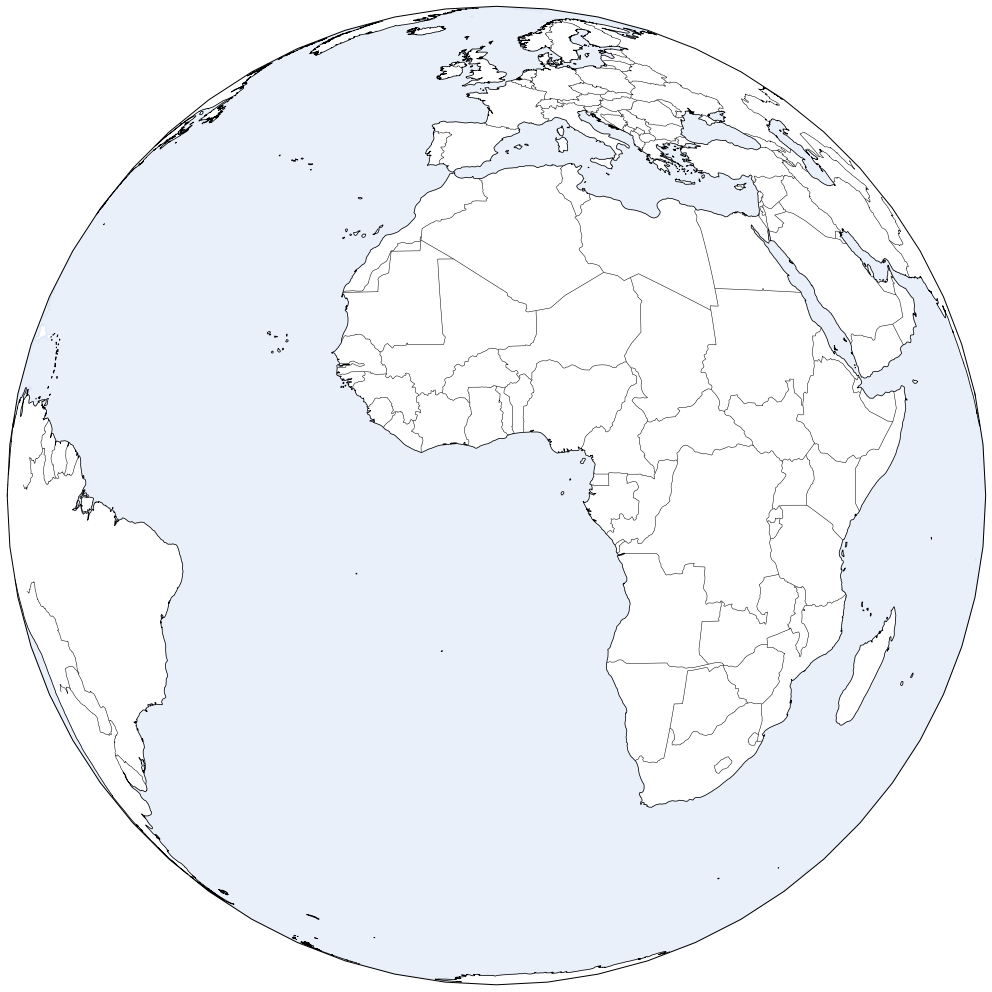

In [106]:
crs = ccrs.Geostationary(central_longitude=0.0)#,satellite_height=85785831
crs2 = ccrs.PlateCarree(central_longitude=0.0)
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(1, 1, 1, projection=crs)

ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.75)
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.OCEAN.with_scale('50m'),alpha=0.2)
    
cmap=cm.YlGn
cmap.set_bad(alpha=0.0)
ax.set_extent([-60,60,-90,90])
img_extent = (-81.26765645410755,81.26765645410755,-74.11423113858775,74.11423113858775)
#norm=colors.Normalize(vmin=-1.0, vmax=7000.0)
data_ma = np.ma.masked_where(data<50,data)
im = ax.imshow(data_ma, cmap="CMRmap", origin='upper',
             extent=img_extent,transform=crs2) #ccrs.PlateCarree() ,extent=img_extent

#cbar = plt.colorbar(im,orientation="horizontal")
cbar = plt.colorbar(im,fraction=0.046, pad=0.04)#,ticks=ticks
posn = ax.get_position()
#cbar.ax.set_position([posn.x0+0.001, posn.y0-0.001,
#                                (posn.x1-posn.x0)/2, posn.height])
#cbar.ax.set_position([])
'''       
ticks = np.arange(1000,4500,500)
outline_effect = [patheffects.withStroke(linewidth=3, foreground='black')]
Y = -240    
for count,ele in enumerate(ticks,0): 
    cbar.ax.text(ele, 2500, ticks[count], 
                         ha='center', va='center',
                         path_effects=outline_effect,
                         color="w",
                         fontsize=6)
        
cbar.set_ticks([])
cbar.ax.set_xticklabels([])
'''


text_time2 = ax.text(0.255, 0.01,
                     "Downward Surface Long-Wave Flux",
                horizontalalignment='right', transform=ax.transAxes,
                color='w', fontsize=12, weight='bold',zorder=15)
outline_effect = [patheffects.withStroke(linewidth=5, foreground='black')]
text_time2.set_path_effects(outline_effect)
    
text_time = ax.text(.995, 0.01, 
                title_time,
                horizontalalignment='right', transform=ax.transAxes,
                color='w', fontsize=12, weight='bold',zorder=15)
outline_effect = [patheffects.withStroke(linewidth=5, foreground='black')]
text_time.set_path_effects(outline_effect)

plt.savefig("LandSaf_"+Product+"_"+file_time+".png",bbox_inches="tight",dpi=100)
plt.show()